In [5]:
# Vorstellung: MNIST-Daten!
# http://yann.lecun.com/exdb/mnist/
# FashionMNIST: https://github.com/zalandoresearch/fashion-mnist

import gzip
import numpy as np
from tensorflow.keras.utils import to_categorical

def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)


def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=8)
    
X_train = open_images("../data/fashion/train-images-idx3-ubyte.gz")
y_train = open_labels("../data/fashion/train-labels-idx1-ubyte.gz")

X_test = open_images("../data/fashion/t10k-images-idx3-ubyte.gz")
y_test = open_labels("../data/fashion/t10k-labels-idx1-ubyte.gz")

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

model = Sequential()

model.add(Conv2D(10, kernel_size=(3, 3), activation="sigmoid", input_shape=(28, 28, 1)))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train.reshape(60000, 28, 28, 1), y_train, epochs=10, batch_size=1000)

/home/alex/anaconda3/envs/ml/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-10-02 11:20:43.555457: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 202ms/step - accuracy: 0.5426 - loss: 1.9911
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 219ms/step - accuracy: 0.7372 - loss: 0.8058
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 236ms/step - accuracy: 0.7818 - loss: 0.6443
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 225ms/step - accuracy: 0.8141 - loss: 0.5411
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 221ms/step - accuracy: 0.8328 - loss: 0.4727
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 212ms/step - accuracy: 0.8507 - loss: 0.4180
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 224ms/step - accuracy: 0.8600 - loss: 0.3949
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 225ms/step - accuracy: 0.8679 - loss: 0.3702
Epoch 9/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 202ms/step - accuracy: 0.8744 - loss: 0.3518
Epoch 10/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 208ms/step - accuracy: 0.8793 - loss: 0.3366


In [3]:
model.layers[0].weights[0]

<Variable path=sequential/conv2d/kernel, shape=(3, 3, 1, 10), dtype=float32, value=[[[[ 0.03324665 -0.04338456  0.02458068  0.159794   -0.0647938
     0.1434857  -0.33625308 -0.24191265 -0.21999744  0.04619554]]

  [[ 0.07758744 -0.06748103  0.06984354  0.04452474 -0.27799526
    -0.13001017 -0.34693706  0.20194553 -0.01417898  0.1169724 ]]

  [[ 0.06637482 -0.2616438  -0.14109904 -0.17404363  0.06981295
     0.06280182 -0.08781438 -0.19595914  0.012638   -0.07151866]]]


 [[[-0.01158347  0.07343107  0.03896498  0.04149165  0.09181792
    -0.21986064 -0.03976583 -0.0122065   0.00477968  0.16923228]]

  [[-0.0507353   0.15118061  0.07555718  0.20186596  0.09384763
    -0.2121976  -0.17280228  0.15653716 -0.09693007 -0.16872035]]

  [[-0.01600512  0.01395103 -0.25747374  0.15061697  0.06538144
     0.05371159  0.17663306  0.0778684  -0.05580072 -0.08556262]]]


 [[[-0.08073182 -0.07803067  0.17288062 -0.1783793  -0.09313532
    -0.00854493  0.04633543 -0.14206293  0.1829854  -0.03114381]

In [6]:
import tensorflow.keras.backend as K

data = K.eval(model.layers[0].weights[0])
print(data)

[[[[ 0.03324665 -0.04338456  0.02458068  0.159794   -0.0647938
     0.1434857  -0.33625308 -0.24191265 -0.21999744  0.04619554]]

  [[ 0.07758744 -0.06748103  0.06984354  0.04452474 -0.27799526
    -0.13001017 -0.34693706  0.20194553 -0.01417898  0.1169724 ]]

  [[ 0.06637482 -0.2616438  -0.14109904 -0.17404363  0.06981295
     0.06280182 -0.08781438 -0.19595914  0.012638   -0.07151866]]]


 [[[-0.01158347  0.07343107  0.03896498  0.04149165  0.09181792
    -0.21986064 -0.03976583 -0.0122065   0.00477968  0.16923228]]

  [[-0.0507353   0.15118061  0.07555718  0.20186596  0.09384763
    -0.2121976  -0.17280228  0.15653716 -0.09693007 -0.16872035]]

  [[-0.01600512  0.01395103 -0.25747374  0.15061697  0.06538144
     0.05371159  0.17663306  0.0778684  -0.05580072 -0.08556262]]]


 [[[-0.08073182 -0.07803067  0.17288062 -0.1783793  -0.09313532
    -0.00854493  0.04633543 -0.14206293  0.1829854  -0.03114381]]

  [[ 0.04755405  0.21696468  0.14506707 -0.12603112  0.09686016
    -0.13064834 

In [7]:
data[:, :, :, 0].reshape(3, 3)

array([[ 0.03324665,  0.07758744,  0.06637482],
       [-0.01158347, -0.0507353 , -0.01600512],
       [-0.08073182,  0.04755405, -0.2679955 ]], dtype=float32)

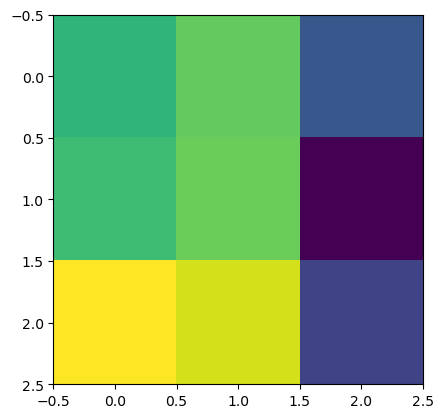

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.imshow(data[:, :, :, 2].reshape(3, 3))
plt.show()

### Vergleich: https://en.wikipedia.org/wiki/Sobel_operator

$ {\displaystyle \mathbf {G} _{x}={\begin{bmatrix}+1&0&-1\\+2&0&-2\\+1&0&-1\end{bmatrix}}*\mathbf {A} \quad {\mbox{and}}\quad \mathbf {G} _{y}={\begin{bmatrix}+1&+2&+1\\0&0&0\\-1&-2&-1\end{bmatrix}}*\mathbf {A} } $ 